In [1]:
from fastai.vision.all import *

In [2]:
# Load Dataset

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)
print(path)
print(path.ls())

C:\Users\mgupta70.ASURITE\.fastai\data\mnist_sample
[Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_sample/labels.csv'), Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_sample/train'), Path('C:/Users/mgupta70.ASURITE/.fastai/data/mnist_sample/valid')]


In [4]:
# Above paths are not readable easily and looks big. Let's modify it to easily handle them

In [7]:
Path.BASE_PATH = path
print(path) # prints actual path but look at output of last line
print(path.ls())
path

C:\Users\mgupta70.ASURITE\.fastai\data\mnist_sample
[Path('labels.csv'), Path('train'), Path('valid')]


Path('.')

In [8]:
# Now they are much more readable. BASE_PATH: next time we use any Path variable, BASE_PATH will be automatically there but we wont see it. 

In [9]:
# Let's see the content of train folder
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [10]:
threes = (path/'train/3').ls()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [11]:
sevens = (path/'train/7').ls()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [12]:
# We could have also used get_image_files to get threes and sevens. Let's see: We will call it _v2

In [13]:
threes_v2 = get_image_files((path/'train/3'))

if threes_v2==threes:
    print('Both are same \n')

threes_v2

Both are same 



(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [14]:
sevens_v2 = get_image_files((path/'train/7'))

if sevens_v2==sevens:
    print('Both are same \n\n')

sevens_v2

Both are same 




(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [15]:
# let's get them sorted to reproduce Jermey's results. Because he used a sorted list

threes = threes.sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [16]:
sevens = sevens.sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

I think it was already sorted. so using it again is not doing anything

In [17]:
# Let's see sample 3 and sample 7
ex_3 = Image.open(threes[0])
ex_3

In [18]:
ex_7 = Image.open(sevens[0])
ex_7

We can also use `show_image` to show images or `.to_thumb()`

<AxesSubplot:>

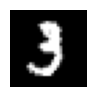

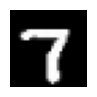

In [19]:
show_image(ex_3, cmap='gray')
show_image(ex_7, cmap='gray')

In [20]:
ex_3.to_thumb(28,28)

**Now we have idea about our dataset and how to read it and get it. Now let's develop a baseline without ML/DL as first attempt**

### Baseline
1. Instinct: Get average of all threes and all sevens. 
    1. First get list of tensors for all the images of 3s and 7s.
    2. Thenconvert list into a stacked tensor
1.  For a new image check its closeness: L1 norm, L2 norm, cosine similarity (by flattening the image)
1.  Hopefully it should work and we will have a baseline.

In [22]:
tns_list_3s = [Image.open(o) for o in threes] # tensor list of 3s
len(tns_list_3s)

6131

In [23]:
tns_list_3s[0]

In [25]:
tns_list_3s[0].shape

(28, 28)

In [26]:
# BUT
type(tns_list_3s[0])

PIL.PngImagePlugin.PngImageFile

This is an image file while we needed list of tensors. So, let's modify the above code to get tensors. Pretty straightforward. Use `tensor()`

In [27]:
tns_list_3s = [tensor(Image.open(o)) for o in threes] # tensor list of 3s
len(tns_list_3s)

6131

In [28]:
tns_list_3s[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219,
         166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254,
         254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

Also it is a good practise to have images as float to allow dividing operations (for *normalisation*). Let's modify the above code to include that


In [29]:
tns_list_3s = [tensor(Image.open(o)).float() for o in threes] # tensor list of 3s
len(tns_list_3s)

6131

In [30]:
tns_list_3s[0]

tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  42.,
         118., 219., 166., 118., 118.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,

In [31]:
tns_list_7s = [tensor(Image.open(o)).float() for o in sevens] # tensor list of 7s
len(tns_list_7s)

6265

Now we convert them from list of tensors to a stacked 3 dimensional tensor using `stack`
-  `torch.stack` takes a list of tensors of same shape and dim - us index pr count badega


In [32]:
tns_list_3s[0].shape

torch.Size([28, 28])

In [33]:
threes_tensor = torch.stack(tns_list_3s, dim=0) # 0 because hume 0 axis pr count badhana h
threes_tensor.shape

torch.Size([6131, 28, 28])

In [34]:
# wrong: but see how stack works
xx = torch.stack(tns_list_3s, dim=1) # 1 because hume 1 axis pr count badhana h
xx.shape

torch.Size([28, 6131, 28])

In [35]:
sevens_tensor = torch.stack(tns_list_7s, dim=0) # 0 because hume 0 axis pr count badhana h
sevens_tensor.shape

torch.Size([6265, 28, 28])

Let's calculate average of all these tensors and see the results

In [36]:
threes_avg = threes_tensor.mean()
print(threes_avg, threes_avg.shape, threes_avg.ndim)

tensor(36.0902) torch.Size([]) 0


- This just gave us a single value - a scalar - 0 *rank* tensor
- But we want 2nd order tensor i.e. a matrix of 28x28 shape

In [37]:
?threes_tensor.mean

In [38]:
threes_avg = threes_tensor.mean(0) # kaunsi axis khatam karni hai - 0
print(threes_avg.shape, threes_avg.ndim)

torch.Size([28, 28]) 2


This looks good. Let's see

In [39]:
?show_image

<AxesSubplot:>

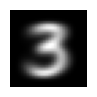

In [40]:
show_image(threes_avg, cmap='gray')

**Note**: `show_image` by fastai is a nice developement to show directly a PIL image and even directly a tensor

torch.Size([28, 28]) 2


<AxesSubplot:>

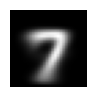

In [41]:
sevens_avg = sevens_tensor.mean(0) # kaunsi axis khatam karni hai - 0
print(sevens_avg.shape, sevens_avg.ndim)
show_image(sevens_avg, cmap='gray')

Now we have a **template/ reference** for 3 and 7 which we will use to compare new images

we will use L1 norm and L2 norm for computation


In [42]:
def l1_norm(a,b):
    ''' calculate l1 norm or mae b/w two tensors a & b'''
    return abs(a-b).mean()

def l2_norm(a,b):
    ''' calculate l2 norm or mse.sqrt() b/w two tensors a & b'''
    return ((a-b)**2).mean().sqrt()

In [43]:
sample_3 = threes_tensor[1]
print(l1_norm(sample_3, threes_avg), l2_norm(sample_3, threes_avg))

tensor(28.4163) tensor(51.5312)


- These values are not same as values in Jermey's notebook because pixel values range from 0-255 here and not 0-1. 
- To do that, let's modify the functions

In [44]:
def l1_norm(a,b, normalise = False):
    ''' calculate l1 norm or mae b/w two tensors a & b'''
    if normalise:
        a = a/255.
        b = b/255.
    return abs(a-b).mean()

def l2_norm(a,b, normalise = False):
    ''' calculate l2 norm or mse.sqrt() b/w two tensors a & b'''
    if normalise:
        a = a/255.
        b = b/255.
    return ((a-b)**2).mean().sqrt()


In [45]:
sample_3 = threes_tensor[1]
print(l1_norm(sample_3, threes_avg, True), l2_norm(sample_3, threes_avg, True))

tensor(0.1114) tensor(0.2021)


Now it is a perfect match !!

In [46]:
# Let's calcualte of sample 3 from 7 average
print(l1_norm(sample_3, sevens_avg, True), l2_norm(sample_3, sevens_avg, True))

tensor(0.1586) tensor(0.3021)


Let's also define cosine similarity

In [47]:
three_av_flat = threes_avg.flatten()
three_av_flat.shape

torch.Size([784])

In [48]:
cos = nn.CosineSimilarity(dim=0, eps=1e-6)

def cosine_sim(a,b):
    ''' calculate cosine similarity b/w a&b'''
    return cos(a.flatten(), b.flatten())



In [49]:
# Now let's see all 3 metrics
print('For sample-3 and 3s-average')
print(l1_norm(sample_3, threes_avg, True), l2_norm(sample_3, threes_avg, True), cosine_sim(sample_3, threes_avg))
print('\nFor sample-3 and 7s-average')
print(l1_norm(sample_3, sevens_avg, True), l2_norm(sample_3, sevens_avg, True), cosine_sim(sample_3, sevens_avg))

For sample-3 and 3s-average
tensor(0.1114) tensor(0.2021) tensor(0.8252)

For sample-3 and 7s-average
tensor(0.1586) tensor(0.3021) tensor(0.5241)


Now let's build a classifier by finding `l1_norm` and picking the closest template as answer

In [50]:
def is_3(a, metric):
    if metric==cosine_sim:
        return metric(a,threes_avg)>metric(a, sevens_avg)
    else:
        return metric(a,threes_avg)<metric(a, sevens_avg)
    

In [51]:
# laod validation
valid_threes = torch.stack([tensor(Image.open(o)).float() for o in (path/'valid/3').ls()], 0) # stack -  kaunsi index ki axis ka count badhana hai - 0
valid_threes.shape

torch.Size([1010, 28, 28])

In [52]:
valid_sevens = torch.stack([tensor(Image.open(o)).float() for o in (path/'valid/7').ls()], 0) # stack -  kaunsi index ki axis ka count badhana hai - 0
valid_sevens.shape

torch.Size([1028, 28, 28])

In [53]:
three_preds = is_3(valid_threes, metric=l1_norm)
three_preds

tensor(True)

- This means that my current code is not doing any broadcasting. So, what could I possibly correct?
- Torch should be doing broadcasting automatically. But it is not? 
- Broadcasting is required where? - at `.mean()` step. 
- **SO, I need to modiy my `.mean()` in defined metrics**
- last time I was using rank 2 tensors for calculating `l1_norm` or `l2_norm`. But now, we have **rank 3** tensors. So, for broadcasting we will have to define *axis* information

In [54]:
def l1_norm(a,b, normalise = False):
    ''' calculate l1 norm or mae b/w two tensors a & b'''
    if normalise:
        a = a/255.
        b = b/255.
    return abs(a-b).mean((1,2))

def l2_norm(a,b, normalise = False):
    ''' calculate l2 norm or mse.sqrt() b/w two tensors a & b'''
    if normalise:
        a = a/255.
        b = b/255.
    return ((a-b)**2).mean((1,2)).sqrt()

cos = nn.CosineSimilarity(dim=0, eps=1e-6)

def cosine_sim(a,b):
    ''' calculate cosine similarity b/w a&b'''
    return cos(a.flatten(), b.flatten())



In [55]:
# let's try again
three_preds = is_3(valid_threes, metric=l1_norm)
three_preds

tensor([ True,  True,  True,  ..., False,  True,  True])

In [56]:
three_preds.shape

torch.Size([1010])

Hurray!! Job Done
- Now we convert binary `True/ False` into 1.0 or 0.0 (float)

In [57]:
three_preds = three_preds.float()
three_preds

tensor([1., 1., 1.,  ..., 0., 1., 1.])

In [58]:
seven_preds = 1-is_3(valid_sevens, metric = l1_norm).float()
seven_preds.shape

torch.Size([1028])

In [59]:
acc_3 = three_preds.mean()
acc_7 = seven_preds.mean()
total_acc = (acc_3+acc_7)/2
acc_3, acc_7, total_acc

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# Let's see if `L2 norm` changes the accuracy or not

In [60]:
three_preds = is_3(valid_threes, metric=l2_norm).float()
seven_preds = 1-is_3(valid_sevens, metric = l2_norm).float()
acc_3 = three_preds.mean()
acc_7 = seven_preds.mean()
total_acc = (acc_3+acc_7)/2
acc_3, acc_7, total_acc

(tensor(0.9584), tensor(0.9737), tensor(0.9661))

# Let's see if `cosine_sim` changes the accuracy or not

In [61]:
three_preds = is_3(valid_threes, metric=cosine_sim).float()
three_preds

RuntimeError: The size of tensor a (791840) must match the size of tensor b (784) at non-singleton dimension 0

Hence we need to modify the way we are flattening in `cosine_sim` so that broadcasting can be done

In [62]:
# trials
xx = valid_threes.flatten(start_dim=1, end_dim=2)
xx.shape

torch.Size([1010, 784])

In [63]:
# let's include this modification
def cosine_sim(a,b):
    ''' calculate cosine similarity b/w a&b'''
    return cos(a.flatten(start_dim=1, end_dim=2), b.flatten())

In [64]:
# now see how it works
cosine_sim(valid_threes,threes_avg).shape

torch.Size([784])

This means it is finding similarity along wrong axis. Let's modify further
- modified `dim=1` from `0` (previously)

In [65]:
# dim =1 not 0
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
# from last time modification
def cosine_sim(a,b):
    ''' calculate cosine similarity b/w a&b'''
    return cos(a.flatten(start_dim=1, end_dim=2), b.flatten())

In [66]:
cosine_sim(valid_threes,threes_avg).shape

torch.Size([1010])

##### Hurray!! now it works

In [67]:
# let's see cosine_sim performance
three_preds = is_3(valid_threes, metric=cosine_sim).float()
seven_preds = 1-is_3(valid_sevens, metric = cosine_sim).float()
acc_3 = three_preds.mean()
acc_7 = seven_preds.mean()
total_acc = (acc_3+acc_7)/2
acc_3, acc_7, total_acc

(tensor(0.9683), tensor(0.9582), tensor(0.9632))

In [68]:
# effect of metric on performance
l1_norm_performance = (tensor(0.9168), tensor(0.9854), tensor(0.9511))
l2_norm_performance = (tensor(0.9584), tensor(0.9737), tensor(0.9661))
cosine_sim_performance = (tensor(0.9683), tensor(0.9582), tensor(0.9632))

**Lessons Learned** - 
1. metrics for sample example (rank-2/3 tensor) and metrics for running on stacked tensors (rank-3/4 tensor) or perhaps batched tensors (rank-4 tensors) would require modification in axis
2. `.mean()` - kaunsi axis khatam karni hai
3. `.stack()`  -kaunse index ki axis ka number badhana hai

# See how a Neural Net learns

In [69]:
def quad(a,b,c,x):
    return a*x**2+b*x+c

f = quad(3,2,1,1)
f

6

Let x varies from -2 to 2 and plot the y values

In [94]:
x = torch.arange(-2,3) # last value i.e. 3 is not included
x

tensor([-2, -1,  0,  1,  2])

In [80]:
y = [quad(3,2,1,z) for z in x]
y

[tensor(9), tensor(2), tensor(1), tensor(6), tensor(17)]

** Another simple trick using broadcasting and avoiding loops like in above**

In [81]:
y = quad(3,2,1,x)
y

tensor([ 9,  2,  1,  6, 17])

Let's check the time savings using broadcasting 

In [102]:
x = torch.arange(-1000,1000) # let's increase number of operation

In [104]:
start = time.time()
y = [quad(3,2,1,z) for z in x]
end = time.time()
print('Time (microsec): ', (end-start)*1000000)

Time (microsec):  36641.597747802734


In [105]:
start = time.time()
y = quad(3,2,1,x)
end = time.time()
print('Time(microsec): ', (end-start)*1000000)

Time(microsec):  1000.8811950683594


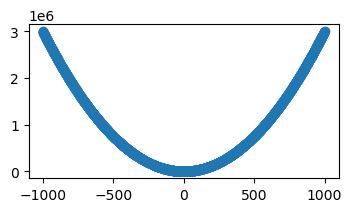

In [106]:
plt.figure(figsize=(4,2))
plt.scatter(x,y)

In [77]:
?torch.linspace

tensor([-2.0000,  0.5000,  3.0000])

Let's create a function to plot graphs given a function

In [111]:
?plt.ylim

In [166]:
def plot_func(params, xmin=-2, xmax = 2, ylim =(-2,18), title = None, color = 'red', num_points = 10):
    x = torch.linspace(xmin,xmax, num_points)
    y = quad(*params,x)
    #plt.figure(figsize=(4,2))
    plt.scatter(x,y, c = color)
    plt.ylim(ylim)
    if title is not None:
        plt.title(title)


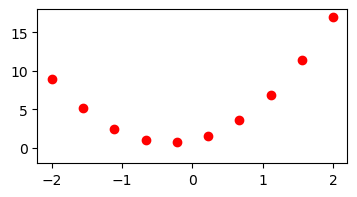

In [129]:
params = [3,2,1]
plt.figure(figsize=(4,2))
plot_func(params, xmin=-2, xmax = 2, ylim =(-2,18), title = None, color = 'red')

In [2]:
# source: https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [131]:
@interact(a=1.1,b=2.5,c=2.5)
def g(a,b,c):
    params = [3,2,1]
    plot_func(params, xmin=-2, xmax = 2, ylim =(-2,18), title = None, color = 'red')
    params2 = [a,b,c]
    plot_func(params2, xmin=-2, xmax = 2, ylim =(-2,18), title = None, color = 'blue', num_points=100)


interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

Here we wont be  knowing the wellness of fit. Alsom since my red dots were from a perfect quadratic let's add noise and make it as a problem of fiitting best curve

In [133]:
x = torch.linspace(-2,2, 15) # linspace include the highest number
x

tensor([-2.0000, -1.7143, -1.4286, -1.1429, -0.8571, -0.5714, -0.2857,  0.0000,
         0.2857,  0.5714,  0.8571,  1.1429,  1.4286,  1.7143,  2.0000])

In [137]:
add_noise = 0.5*(torch.randn(len(x)))
add_noise

tensor([ 0.2655, -0.8188,  0.2074, -0.2230,  0.0577,  0.5243, -0.3061, -0.9789,
        -0.1542,  1.2832, -0.4217,  0.6343, -0.4541,  0.7993,  1.1855])

In [138]:
mult_noise = 1+ 0.05*(torch.randn(len(x)))
mult_noise

tensor([0.9615, 0.9920, 1.0367, 1.0874, 1.0856, 1.0431, 1.0331, 1.0198, 1.0772,
        1.0096, 0.9882, 0.9495, 1.0705, 0.9825, 0.9520])

In [139]:
y_ideal = quad(3,2,1,x)
y_ideal

tensor([ 9.0000,  6.3878,  4.2653,  2.6327,  1.4898,  0.8367,  0.6735,  1.0000,
         1.8163,  3.1224,  4.9184,  7.2041,  9.9796, 13.2449, 17.0000])

In [143]:
y_synthetic = y_ideal*mult_noise+add_noise
y_synthetic

tensor([ 8.9194,  5.5179,  4.6290,  2.6398,  1.6751,  1.3971,  0.3897,  0.0409,
         1.8024,  4.4356,  4.4384,  7.4743, 10.2295, 13.8127, 17.3702])

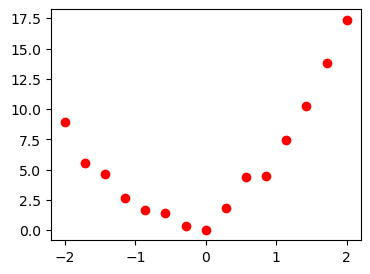

In [165]:
plt.figure(figsize=(4,3))
plt.scatter(x,y_synthetic, c='red')


In [151]:
@interact(a=1,b=1,c=1)
def g(a,b,c):
    plt.figure(figsize=(4,3))
    plt.scatter(x,y_synthetic, c='red')
    params = [a,b,c]
    plot_func(params, xmin=-2, xmax = 2, ylim =(-2,18), title = None, color = 'blue', num_points=100)

interactive(children=(IntSlider(value=1, description='a', max=3, min=-1), IntSlider(value=1, description='b', …

We see this create slider to change at every integer, we don;t want that. Just modify a=1. instead of 1

Let's find value to determine the closeness to fit: Mean square error

In [170]:
@interact(a=1.,b=1.,c=1.)
def g(a,b,c):
    plt.figure(figsize=(4,3))
    plt.scatter(x,y_synthetic, c='red')
    params = [a,b,c]
    y_preds = quad(a,b,c,x)
    mse = ((y_synthetic-y_preds)**2).mean()
    print('\tMSE', mse.item())
    plot_func(params, xmin=-2, xmax = 2, ylim =(-2,18), color = 'blue', num_points=100)

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, min=-1.0), FloatSlider(value=1.0, descr…

In [171]:
# Now create a neural network to do this automatically

In [173]:
a,b,c = torch.randn(3)
a,b,c

(tensor(-0.4048), tensor(-1.3822), tensor(0.7067))

In [175]:
y_preds = quad(3,2,1,x)
y_preds

tensor([ 9.0000,  6.3878,  4.2653,  2.6327,  1.4898,  0.8367,  0.6735,  1.0000,
         1.8163,  3.1224,  4.9184,  7.2041,  9.9796, 13.2449, 17.0000])

In [176]:
y_true = y_synthetic # y_synthetic is basically truth for us. So let's just create this to intuitively use this variable
y_true

tensor([ 8.9194,  5.5179,  4.6290,  2.6398,  1.6751,  1.3971,  0.3897,  0.0409,
         1.8024,  4.4356,  4.4384,  7.4743, 10.2295, 13.8127, 17.3702])

In [177]:
loss = ((y_preds - y_true)**2).mean()
loss
    

tensor(0.3196)

Now we want to update parameters to reduce loss

In [178]:
# let's say we want to derivative of something with respect to a,b,c
a.requires_grad_()
b.requires_grad_()
c.requires_grad_()

a,b,c

(tensor(-0.4048, requires_grad=True),
 tensor(-1.3822, requires_grad=True),
 tensor(0.7067, requires_grad=True))

In [179]:
# now we can take derivative of something with a,b,c
# whose derivative we want? -> loss
# let's do that by using .backward()

loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [180]:
y_preds = quad(a,b,c,x)
y_preds

tensor([ 1.8518,  1.8865,  1.8551,  1.7576,  1.5940,  1.3643,  1.0685,  0.7067,
         0.2787, -0.2154, -0.7755, -1.4018, -2.0941, -2.8526, -3.6771],
       grad_fn=<AddBackward0>)

In [183]:
a.grad

In [184]:
a.grad()

TypeError: 'NoneType' object is not callable

In [185]:
loss = ((y_preds - y_true)**2).mean()
loss

tensor(71.6691, grad_fn=<MeanBackward0>)

In [186]:
a.grad

In [187]:
a.grad()

TypeError: 'NoneType' object is not callable

In [188]:
loss.backward()

In [189]:
a.grad

tensor(-29.4870)

In [190]:
# so now we calculated gradient of loss w.r.t. a
# we can see how gradient are w.r.t. b and c
a.grad, b.grad, c.grad

(tensor(-29.4870), tensor(-10.7666), tensor(-11.1234))

In [192]:
# now we want to update. This update if we do without torch.no_grad(), let's see what happens
lr = 0.05
a = a-lr*a.grad
b = b-lr*b.grad
c = c-lr*c.grad

In [194]:
a,b,c

(tensor(1.0695, grad_fn=<SubBackward0>),
 tensor(-0.8439, grad_fn=<SubBackward0>),
 tensor(1.2628, grad_fn=<SubBackward0>))

In [193]:
# now it is said that this should change our derivatives let's check
a.grad, b.grad, c.grad

C:\Users\mgupta70.ASURITE\AppData\Local\Temp\ipykernel_17600\1389521126.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:485.)
  a.grad, b.grad, c.grad


(None, None, None)

In [203]:
# now let's combine this in one codecell
a,b,c = torch.randn(3)
print(a,b,c)

a.requires_grad_()
b.requires_grad_()
c.requires_grad_()

print(a,b,c)
print(a.grad, b.grad, c.grad)

y_preds = quad(a,b,c,x)
print('y_preds: ',y_preds)
print(a.grad, b.grad, c.grad)

loss = ((y_preds - y_true)**2).mean()
print('loss: ',loss)

loss.backward()
print(a.grad, b.grad, c.grad)

lr = 0.05
with torch.no_grad():
    a = a-lr*a.grad
    b = b-lr*b.grad
    c = c-lr*c.grad
    
print(a,b,c)
print(a.grad, b.grad, c.grad)

tensor(1.3074) tensor(0.8839) tensor(0.1556)
tensor(1.3074, requires_grad=True) tensor(0.8839, requires_grad=True) tensor(0.1556, requires_grad=True)
None None None
y_preds:  tensor([3.6172, 2.4823, 1.5609, 0.8529, 0.3584, 0.0774, 0.0098, 0.1556, 0.5149,
        1.0876, 1.8738, 2.8734, 4.0865, 5.5130, 7.1529],
       grad_fn=<AddBackward0>)
None None None
loss:  tensor(20.3463, grad_fn=<MeanBackward0>)
tensor(-16.9391) tensor(-3.8601) tensor(-7.0074)
tensor(2.1543) tensor(1.0770) tensor(0.5060)
None None None


**At the end the grad are None. This should not happen.  The gradient value should remain conserved**


In [204]:
# now let's fo it for 10 epochs
epochs= 10
lr = 0.05


for epoch in range(epochs):
    print('Epoch: ',epoch)
    y_preds = quad(a,b,c,x)
    #print('y_preds: ',y_preds)
    print(a.grad, b.grad, c.grad)

    loss = ((y_preds - y_true)**2).mean()
    print('loss: ',loss)

    loss.backward()
    print('Gradients', a.grad, b.grad, c.grad)


    with torch.no_grad():
        a = a-lr*a.grad
        b = b-lr*b.grad
        c = c-lr*c.grad

    print(a,b,c)
    
    #print(a.grad, b.grad, c.grad)

Epoch:  0
None None None
loss:  tensor(6.8636)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

**Here, I have a,b,c as separate i.e. *leaf*. I need to bring them together**

In [222]:
params = torch.randn(3)
params, params.shape

(tensor([ 1.0475,  0.4606, -0.9901]), torch.Size([3]))

In [278]:
params.requires_grad_()

y_preds = quad(*params, x)
loss = ((y_preds-y_true)**2).sum()
loss.backward()
print('Loss: ', loss)
print('Gradients before no_grad: ',params.grad)
with torch.no_grad():
    params = params-lr*params.grad
    
print('Gradients after no_grad: ',params.grad)
print('params: ',params)

Loss:  tensor(799.6996, grad_fn=<SumBackward0>)
Gradients before no_grad:  tensor([-382.8632, -152.4936, -144.2843])
Gradients after no_grad:  None
params:  tensor([19.2708,  6.4519,  8.0973])


In [ ]:
# Gadbad

In [282]:
# let's replace loss by writing a function instead where all three parameters are taken in 1 go:

def mae_v2(y_preds, y_true):
    return abs(y_preds-y_true).sum()


def mse_v2(y_preds, y_true):
    return ((y_preds-y_true)**2).sum()

params = torch.randn(3)
params.requires_grad_()

y_preds = quad(*params, x)
loss = mae_v2(y_preds, y_true)
loss.backward()
print('Loss: ', loss)
print('Gradients before no_grad: ',params.grad)
with torch.no_grad():
    params= params - 0.01*params.grad
    
print('Gradients after no_grad: ',params.grad)
print('params: ',params)

Loss:  tensor(49.1084, grad_fn=<SumBackward0>)
Gradients before no_grad:  tensor([-12.8980,  -7.4286,  -9.0000])
Gradients after no_grad:  None
params:  tensor([ 1.7182, -0.5255,  0.0851])


**Still the same but what if I replace** 


`with torch.no_grad():`

`params= params - 0.01*params.grad`

**BY**

`with torch.no_grad():`

`params-= 0.01*params.grad`

*because I saw this in Jermey's code

**I know why--->**
because  `params= params - 0.01*params.grad` creates a new parameter `params` and assign values in that. By default this *new* `params` has **NO** `requires_grad_()` while when we use 
`params-= 0.01*params.grad` the values of `params` are changed inplace and since it already has `requires_grad_()` , the code works in this case

In [283]:
# let's replace loss by writing a function instead where all three parameters are taken in 1 go:

def mae_v2(y_preds, y_true):
    return abs(y_preds-y_true).sum()


def mse_v2(y_preds, y_true):
    return ((y_preds-y_true)**2).sum()

params = torch.randn(3)
params.requires_grad_()

y_preds = quad(*params, x)
loss = mae_v2(y_preds, y_true)
loss.backward()
print('Loss: ', loss)
print('Gradients before no_grad: ',params.grad)
with torch.no_grad():
    params-= - 0.01*params.grad
    
print('Gradients after no_grad: ',params.grad)
print('params: ',params)

Loss:  tensor(79.8258, grad_fn=<SumBackward0>)
Gradients before no_grad:  tensor([-2.2857e+01, -1.1921e-07, -1.5000e+01])
Gradients after no_grad:  tensor([-2.2857e+01, -1.1921e-07, -1.5000e+01])
params:  tensor([ 0.4969, -0.1780, -0.9257], requires_grad=True)


**Seems like this line of code makes a huge differnce**

`with torch.no_grad():`

`params= params - 0.01*params.grad`

**VS**

`with torch.no_grad():`

`params-= 0.01*params.grad`

In [224]:
epochs = 10
for epoch in range(epochs):
    print('Epoch: ', epoch)
    y_preds = quad(*params, x)
    loss = ((y_preds-y_true)**2).sum()
    loss.backward()
    print('Loss: ', loss)
    print('Gradients before no_grad: ',params.grad)
    with torch.no_grad():
        params -= lr*params.grad
        

    print('Gradients after no_grad: ',params.grad)
    print('params: ', params)

Epoch:  0


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [213]:
params = torch.randn(3)
print('params: ',params)
params.requires_grad_()

y_preds = quad(*params, x)
loss = ((y_preds-y_true)**2).sum()
loss.backward()
print('Loss: ', loss)
print('Gradients before no_grad: ',params.grad)
with torch.no_grad():
    params = params-lr*params.grad
    
print('Gradients after no_grad: ',params.grad)
print('params: ',params)

params:  tensor([-0.1172,  1.5194, -1.0695])
Loss:  tensor(997.1415, grad_fn=<SumBackward0>)
Gradients before no_grad:  tensor([-487.6532,  -28.8513, -206.9884])
Gradients after no_grad:  None
params:  tensor([24.2654,  2.9620,  9.2799])


In [216]:
# let;s create a function with single input

def mk_quad(a,b,c):
    return partial(quad,a,b,c)

In [217]:
a = mk_quad(3,2,1)
a

functools.partial(<function quad at 0x000001EE71952F80>, 3, 2, 1)

In [218]:
a(3)

34

In [225]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()
def mse(preds, acts): return ((preds-acts)**2).mean()

### According to Jeremy notebook 301
**To do autmatic gradient calculation, first we need a function that takes all the parameters `a`, `b`, and `c` as a single vector input, and returns the value `mae()` based on those parameters**

In [227]:
def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x),y_true)

In [230]:
abc = torch.tensor([1.1,1.1,1.1])
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [231]:
loss = quad_mae(abc)
loss

tensor(3.0813, grad_fn=<MeanBackward0>)

In [232]:
loss.backward()

In [233]:
abc.grad

tensor([-1.5129, -0.0381, -0.7333])

In [238]:
abc.shape, abc.ndim

(torch.Size([3]), 1)

In [239]:
params.shape, params.ndim

(torch.Size([3]), 1)

In [236]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mae(abc)
    print(abc.grad)
    
print(f'loss={loss:.2f}')

tensor([-1.5129, -0.0381, -0.7333])
loss=3.00


In [242]:
# now see 1 epoch

print('params: ',params)
params.requires_grad_()

# y_preds = quad(*params, x)
# loss = ((y_preds-y_true)**2).sum()
loss = quad_mae(params)
loss.backward()
print('Loss: ', loss)
print('Gradients before no_grad: ',params.grad)
with torch.no_grad():
    params -= lr*params.grad
    
    print('Gradients after no_grad: ',params.grad)
print('params: ',params)

params:  tensor([ 1.5859, -0.4191,  2.4926], requires_grad=True)
Loss:  tensor(2.9969, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([ 0.0327, -3.0857,  0.6000])
Gradients after no_grad:  tensor([ 0.0327, -3.0857,  0.6000])
params:  tensor([ 1.5843, -0.2649,  2.4626], requires_grad=True)


In [243]:
# Lets do it for 10 epochs

# now see 1 epoch

epochs = 10
for epoch in range(epochs):
    print('\n Epoch: ', epoch)
    print('params: ',params)
    loss = quad_mae(params)
    loss.backward()
    print('Loss: ', loss)
    print('Gradients before no_grad: ',params.grad)
    with torch.no_grad():
        params -= lr*params.grad
        print('Gradients after no_grad: ',params.grad)
    print('params: ',params)


 Epoch:  0
params:  tensor([ 1.5843, -0.2649,  2.4626], requires_grad=True)
Loss:  tensor(2.8321, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([ 0.0435, -4.1143,  0.8000])
Gradients after no_grad:  tensor([ 0.0435, -4.1143,  0.8000])
params:  tensor([ 1.5821, -0.0591,  2.4226], requires_grad=True)

 Epoch:  1
params:  tensor([ 1.5821, -0.0591,  2.4226], requires_grad=True)
Loss:  tensor(2.6192, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-0.4789, -4.8762,  0.8667])
Gradients after no_grad:  tensor([-0.4789, -4.8762,  0.8667])
params:  tensor([1.6060, 0.1847, 2.3793], requires_grad=True)

 Epoch:  2
params:  tensor([1.6060, 0.1847, 2.3793], requires_grad=True)
Loss:  tensor(2.4181, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-1.0014, -5.6381,  0.9333])
Gradients after no_grad:  tensor([-1.0014, -5.6381,  0.9333])
params:  tensor([1.6561, 0.4666, 2.3326], requires_grad=True)

 Epoch:  3
params:  tensor([1.6561, 0.4666, 2.3326], requires_grad

In [246]:
# My another trial after understanding this

In [247]:
y_true

tensor([ 8.9194,  5.5179,  4.6290,  2.6398,  1.6751,  1.3971,  0.3897,  0.0409,
         1.8024,  4.4356,  4.4384,  7.4743, 10.2295, 13.8127, 17.3702])

In [248]:
x

tensor([-2.0000, -1.7143, -1.4286, -1.1429, -0.8571, -0.5714, -0.2857,  0.0000,
         0.2857,  0.5714,  0.8571,  1.1429,  1.4286,  1.7143,  2.0000])

In [271]:
params = torch.randn(3)
params

tensor([-0.0433, -1.6133, -1.7210])

In [272]:
params.requires_grad_()

tensor([-0.0433, -1.6133, -1.7210], requires_grad=True)

In [273]:
def loss_mse(params):
    y_preds = quad(*params,x)
    return mae(y_preds,y_true)

In [274]:
# Lets do it for 10 epochs

# now see 1 epoch

epochs = 10
for epoch in range(epochs):
    print('\n Epoch: ', epoch)
    print('params: ',params)
    loss = loss_mse(params)
    loss.backward()
    print('Loss: ', loss)
    print('Gradients before no_grad: ',params.grad)
    with torch.no_grad():
        params -= 0.01*params.grad
        print('Gradients after no_grad: ',params.grad)
    print('params: ',params)


 Epoch:  0
params:  tensor([-0.0433, -1.6133, -1.7210], requires_grad=True)
Loss:  tensor(7.4384, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-1.5238e+00,  2.2352e-08, -1.0000e+00])
Gradients after no_grad:  tensor([-1.5238e+00,  2.2352e-08, -1.0000e+00])
params:  tensor([-0.0280, -1.6133, -1.7110], requires_grad=True)

 Epoch:  1
params:  tensor([-0.0280, -1.6133, -1.7110], requires_grad=True)
Loss:  tensor(7.4051, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-3.0476e+00,  4.4703e-08, -2.0000e+00])
Gradients after no_grad:  tensor([-3.0476e+00,  4.4703e-08, -2.0000e+00])
params:  tensor([ 0.0024, -1.6133, -1.6910], requires_grad=True)

 Epoch:  2
params:  tensor([ 0.0024, -1.6133, -1.6910], requires_grad=True)
Loss:  tensor(7.3387, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-4.5714e+00,  6.7055e-08, -3.0000e+00])
Gradients after no_grad:  tensor([-4.5714e+00,  6.7055e-08, -3.0000e+00])
params:  tensor([ 0.0482, -1.6133, -1.6610], requir

In [276]:
# Lets do it for 10 epochs
params = torch.randn(3)
print(params)

params.requires_grad_()

def mse_loss_v2(y_preds):
    return mae(y_preds, y_true)

epochs = 10
for epoch in range(epochs):
    print('\n Epoch: ', epoch)
    print('params: ',params)
    y_preds  = quad(*params,x)
    loss = mse_loss_v2(y_preds)
    loss.backward()
    print('Loss: ', loss)
    print('Gradients before no_grad: ',params.grad)
    with torch.no_grad():
        params -= 0.01*params.grad
        print('Gradients after no_grad: ',params.grad)
    print('params: ',params)

tensor([0.5694, 0.5091, 0.1186])

 Epoch:  0
params:  tensor([0.5694, 0.5091, 0.1186], requires_grad=True)
Loss:  tensor(4.6755, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-1.5238e+00,  2.2352e-08, -8.6667e-01])
Gradients after no_grad:  tensor([-1.5238e+00,  2.2352e-08, -8.6667e-01])
params:  tensor([0.5846, 0.5091, 0.1273], requires_grad=True)

 Epoch:  1
params:  tensor([0.5846, 0.5091, 0.1273], requires_grad=True)
Loss:  tensor(4.6448, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-3.0476e+00,  4.4703e-08, -1.7333e+00])
Gradients after no_grad:  tensor([-3.0476e+00,  4.4703e-08, -1.7333e+00])
params:  tensor([0.6151, 0.5091, 0.1446], requires_grad=True)

 Epoch:  2
params:  tensor([0.6151, 0.5091, 0.1446], requires_grad=True)
Loss:  tensor(4.5833, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-4.5714e+00,  6.7055e-08, -2.6000e+00])
Gradients after no_grad:  tensor([-4.5714e+00,  6.7055e-08, -2.6000e+00])
params:  tensor([0.6608, 0.5091, 

**Another Very IMPORTANT thing to notice is that:**

`params.grad` keeps on increasing.
**What will happen due to this?** -> With every epoch the updates would be larger

**What could be the implication of this?** -> loss start to increase. 

*It may look like that your loss is improving but this will be true only for first few epochs or if your `lr` is too low. But if I increase the epochs to say 100 then definitely, you will see loss increasing.

**For example see below:**

In [294]:
# Lets do it for 10 epochs
#params = torch.randn(3)
params =tensor([ 1.4320,  1.1010, -0.7869])
print(params)

params.requires_grad_()
losses = []
def mse_loss_v2(y_preds, y_true):
    return mae(y_preds, y_true)

epochs = 20
for epoch in range(epochs):
    print('\n Epoch: ', epoch)
    print('params: ',params)
    y_preds  = quad(*params,x)
    loss = mse_loss_v2(y_preds, y_true)
    losses.append(loss.item())
    loss.backward()
    print('Loss: ', loss)
    print('Gradients before no_grad: ',params.grad)
    with torch.no_grad():
        params -= 0.01*params.grad
        print('Gradients after no_grad: ',params.grad)
    print('params: ',params)

tensor([ 1.4320,  1.1010, -0.7869])

 Epoch:  0
params:  tensor([ 1.4320,  1.1010, -0.7869], requires_grad=True)
Loss:  tensor(4.2563, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-1.5238e+00,  2.2352e-08, -1.0000e+00])
Gradients after no_grad:  tensor([-1.5238e+00,  2.2352e-08, -1.0000e+00])
params:  tensor([ 1.4472,  1.1010, -0.7769], requires_grad=True)

 Epoch:  1
params:  tensor([ 1.4472,  1.1010, -0.7769], requires_grad=True)
Loss:  tensor(4.2231, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-3.0476e+00,  4.4703e-08, -2.0000e+00])
Gradients after no_grad:  tensor([-3.0476e+00,  4.4703e-08, -2.0000e+00])
params:  tensor([ 1.4777,  1.1010, -0.7569], requires_grad=True)

 Epoch:  2
params:  tensor([ 1.4777,  1.1010, -0.7569], requires_grad=True)
Loss:  tensor(4.1566, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-4.5714e+00,  6.7055e-08, -3.0000e+00])
Gradients after no_grad:  tensor([-4.5714e+00,  6.7055e-08, -3.0000e+00])
params:  tensor

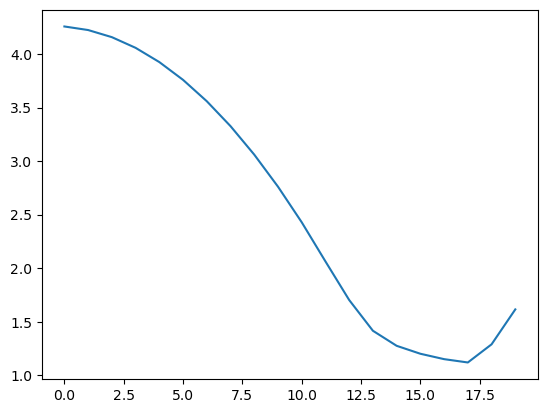

In [295]:
plt.plot(range(epochs), losses)

# To counter this, I will have to set the `params.grad` to be zero after update has happened

In [297]:
dir(params.grad)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_eq__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr_

In [298]:
# Lets do it for 10 epochs
#params = torch.randn(3)
params =tensor([ 1.4320,  1.1010, -0.7869])
print(params)

params.requires_grad_()
losses = []

epochs = 20
for epoch in range(epochs):
    print('\n Epoch: ', epoch)
    print('params: ',params)
    y_preds  = quad(*params,x)
    loss = mse_loss_v2(y_preds, y_true)
    losses.append(loss.item())
    loss.backward()
    print('Loss: ', loss)
    print('Gradients before no_grad: ',params.grad)
    with torch.no_grad():
        params -= 0.01*params.grad
        params.grad.zero_()
        print('Gradients after no_grad: ',params.grad)
    print('params: ',params)

tensor([ 1.4320,  1.1010, -0.7869])

 Epoch:  0
params:  tensor([ 1.4320,  1.1010, -0.7869], requires_grad=True)
Loss:  tensor(4.2563, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-1.5238e+00,  2.2352e-08, -1.0000e+00])
Gradients after no_grad:  tensor([0., 0., 0.])
params:  tensor([ 1.4472,  1.1010, -0.7769], requires_grad=True)

 Epoch:  1
params:  tensor([ 1.4472,  1.1010, -0.7769], requires_grad=True)
Loss:  tensor(4.2231, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-1.5238e+00,  2.2352e-08, -1.0000e+00])
Gradients after no_grad:  tensor([0., 0., 0.])
params:  tensor([ 1.4625,  1.1010, -0.7669], requires_grad=True)

 Epoch:  2
params:  tensor([ 1.4625,  1.1010, -0.7669], requires_grad=True)
Loss:  tensor(4.1898, grad_fn=<MeanBackward0>)
Gradients before no_grad:  tensor([-1.5238e+00,  2.2352e-08, -1.0000e+00])
Gradients after no_grad:  tensor([0., 0., 0.])
params:  tensor([ 1.4777,  1.1010, -0.7569], requires_grad=True)

 Epoch:  3
params:  tensor([ 1

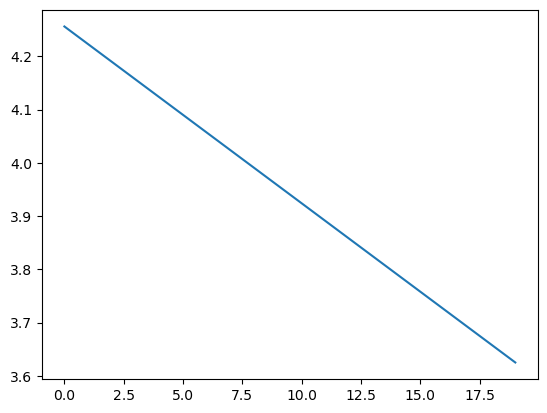

In [299]:
plt.plot(range(epochs), losses)

# Hurray!
**Lessons Learned:**
0. combine all parameters `a`,`b`,`c` into a single tensor `params`
1. `loss` 
2. `loss.backward()` : this calculate gradient of loss w.r.t. `params` and store it in `params.grad`
3. update `params` inplace *rather* than doing *assignment* approach
4. set `params.grad.zero_()` : to avoid *gradient accumulation*

In [300]:
# Now let's add non-linearity which allows Neural Network to be Universal Learners

In [301]:
def str_line(m,c,x):
    
    return m*x+c

In [305]:
?torch.clip

In [306]:
torch.clip(torch.tensor(2),min =torch.tensor(0), max = tensor(10))

tensor(2)

In [307]:
torch.clip(torch.tensor(-2),min =torch.tensor(0), max = tensor(10))

tensor(0)

In [308]:
#We don't need to define max, if we dont want
torch.clip(torch.tensor(-2),min =torch.tensor(0))

tensor(0)

In [9]:
def rectified_linear(m,c):
    y = m*x+c
    return torch.clip(y, min =torch.tensor(0.))

Text(0.5, 1.0, 'Combined Relu-1 and Relu-2')

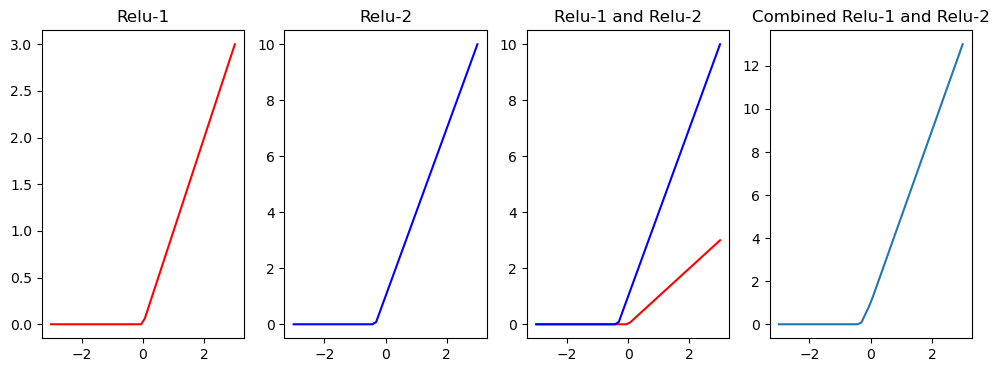

In [12]:
x = torch.linspace(-3,3,50)
y1 = rectified_linear(1,0)
y2 = rectified_linear(3,1)
y4 = y1+y2

plt.figure(figsize =(12,4))
plt.subplot(1,4,1)
plt.plot(x,y1, c= 'red')
plt.title('Relu-1')
plt.subplot(1,4,2)
plt.plot(x,y2, c='blue')
plt.title('Relu-2')
plt.subplot(1,4,3)
plt.plot(x,y1, c='red')
plt.plot(x,y2, c='blue')
plt.title('Relu-1 and Relu-2')
plt.subplot(1,4,4)
plt.plot(x,y4)
plt.title('Combined Relu-1 and Relu-2')

In [16]:
plt.figure(figsize =(5,3))
@interact(m1=1.,c1=1.,m2=-2.,c2=-2.)
def g(m1,c1,m2,c2):
    
    y1 = rectified_linear(m1,c1)
    y2 = rectified_linear(m2,c2)
    y4 = y1+y2
    plt.plot(x,y4)
    plt.title('Combined Relu-1 and Relu-2')
    

<Figure size 500x300 with 0 Axes>

interactive(children=(FloatSlider(value=1.0, description='m1', max=3.0, min=-1.0), FloatSlider(value=1.0, desc…

In [14]:
# Let's see if we didn't had relu then there will be no non-linearity

In [27]:
x = torch.linspace(-3,3,100)

def str_line(m,c):
    y = m*x+c
    return y



plt.figure(figsize =(5,3))
@interact(m1=1.,c1=1.8,m2=-1.,c2=-2.)
def g(m1,c1,m2,c2):
    
    y1 = str_line(m1,c1)
    y2 = str_line(m2,c2)
    y4 = y1+y2
    plt.figure(figsize=(12,4))
#     plt.subplot(1,4,1)
#     plt.plot(x,y1, c= 'red')
#     plt.title('Str-1')
#     plt.subplot(1,4,2)
#     plt.plot(x,y2, c='blue')
#     plt.title('Str-2')
#     plt.subplot(1,4,3)
#     plt.plot(x,y1, c='red')
#     plt.plot(x,y2, c='blue')
#     plt.title('Relu-1 and Relu-2')
#     plt.subplot(1,4,4)
    plt.plot(x,y4)
    plt.title('Combined Str-1 and Str-2')
    
    

<Figure size 500x300 with 0 Axes>

interactive(children=(FloatSlider(value=1.0, description='m1', max=3.0, min=-1.0), FloatSlider(value=1.8, desc…

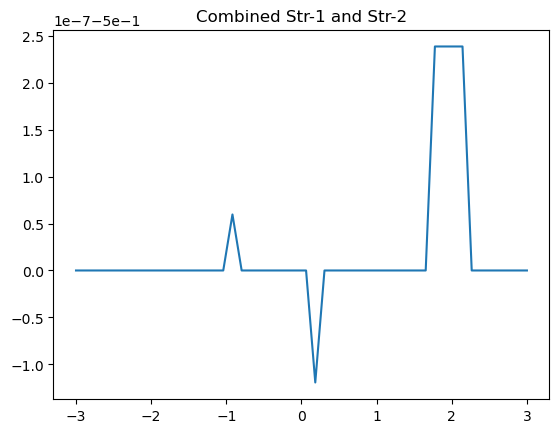

In [30]:
x = torch.linspace(-3,3,50)
m1 = 1.0
c1 = -1.8
m2 = -1.0
c2 = -2.0
y1 = str_line(m1,c1)
y2 = str_line(m2,c2)
y1

tensor([-4.8000, -4.6776, -4.5551, -4.4327, -4.3102, -4.1878, -4.0653, -3.9429,
        -3.8204, -3.6980, -3.5755, -3.4531, -3.3306, -3.2082, -3.0857, -2.9633,
        -2.8408, -2.7184, -2.5959, -2.4735, -2.3510, -2.2286, -2.1061, -1.9837,
        -1.8612, -1.7388, -1.6163, -1.4939, -1.3714, -1.2490, -1.1265, -1.0041,
        -0.8816, -0.7592, -0.6367, -0.5143, -0.3918, -0.2694, -0.1469, -0.0245,
         0.0980,  0.2204,  0.3429,  0.4653,  0.5878,  0.7102,  0.8327,  0.9551,
         1.0776,  1.2000])

In [31]:
y2

tensor([ 1.0000,  0.8776,  0.7551,  0.6327,  0.5102,  0.3878,  0.2653,  0.1429,
         0.0204, -0.1020, -0.2245, -0.3469, -0.4694, -0.5918, -0.7143, -0.8367,
        -0.9592, -1.0816, -1.2041, -1.3265, -1.4490, -1.5714, -1.6939, -1.8163,
        -1.9388, -2.0612, -2.1837, -2.3061, -2.4286, -2.5510, -2.6735, -2.7959,
        -2.9184, -3.0408, -3.1633, -3.2857, -3.4082, -3.5306, -3.6531, -3.7755,
        -3.8980, -4.0204, -4.1429, -4.2653, -4.3878, -4.5102, -4.6327, -4.7551,
        -4.8776, -5.0000])

In [32]:
y4 = y1+y2
y4

tensor([-3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000,
        -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000,
        -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000,
        -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000,
        -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000,
        -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000, -3.8000,
        -3.8000, -3.8000])

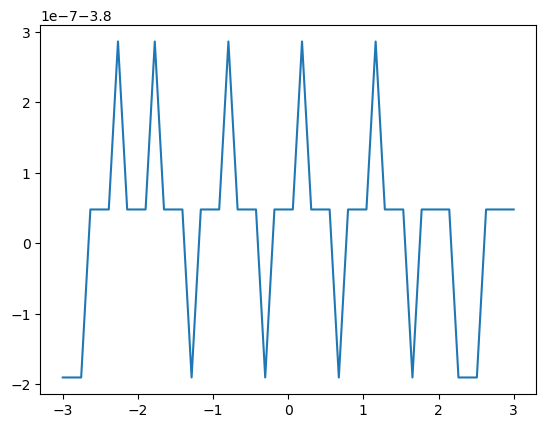

In [33]:
plt.plot(x,y4)

In [28]:
# This is due to scale issue. see on top left of the image

(-10.0, 10.0)

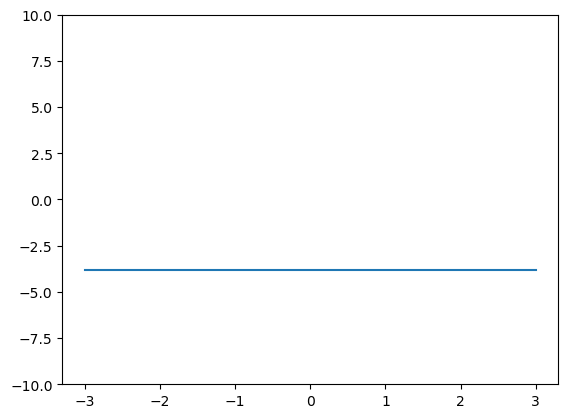

In [34]:
plt.plot(x,y4)
plt.ylim(-10,10)

In [35]:
x = torch.linspace(-3,3,100)

def str_line(m,c):
    y = m*x+c
    return y



plt.figure(figsize =(5,3))
@interact(m1=1.,c1=1.8,m2=-1.,c2=-2.)
def g(m1,c1,m2,c2):
    
    y1 = str_line(m1,c1)
    y2 = str_line(m2,c2)
    y4 = y1+y2
    plt.figure(figsize=(12,4))
    plt.subplot(1,4,1)
    plt.plot(x,y1, c= 'red')
    plt.ylim(-10,10)
    plt.title('Str-1')
    plt.subplot(1,4,2)
    plt.plot(x,y2, c='blue')
    plt.ylim(-10,10)
    plt.title('Str-2')
    plt.subplot(1,4,3)
    plt.plot(x,y1, c='red')
    plt.plot(x,y2, c='blue')
    plt.ylim(-10,10)
    plt.title('Relu-1 and Relu-2')
    plt.subplot(1,4,4)
    plt.plot(x,y4)
    plt.ylim(-10,10)
    plt.title('Combined Str-1 and Str-2')
    
    

<Figure size 500x300 with 0 Axes>

interactive(children=(FloatSlider(value=1.0, description='m1', max=3.0, min=-1.0), FloatSlider(value=1.8, desc…

In [ ]:
# Now we can see just adding straight lines do not add non-linearity